# Three variable Monte-Carlo exponential function integral


In [109]:
# TODO:
# * beta is inaccurate & mass-dep: testing exponential mass function
# * formula is incorrect: 
# - testing r = 0 case
# - testing sigma_zeta = 0 => 2 observable case
# * numerical inaccuracy of PDF
# - testing 1D pdf (2 observables)
# <Sigma | lambda> = … 
# integration over lambda


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
from tqdm import tqdm,trange
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading exponential mass function.


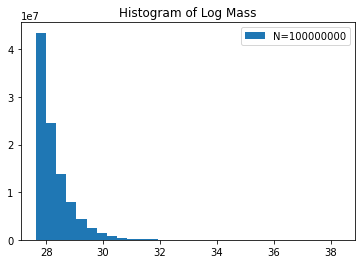

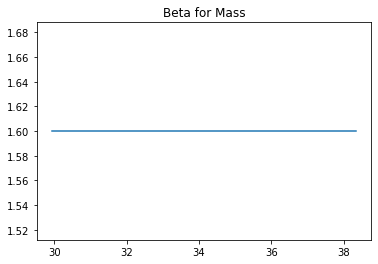

In [111]:
from mass_function import MassFunction

mf = MassFunction(kind="exponential")

# Richness scaling relations


In [112]:
from scaling_relation import ScalingRelation

sr = ScalingRelation()

self.alpha_lam=0.939, self.pi_lam=-27.547425726070088, self.scatter_lam=0.36
self.alpha_SZ=1.519, self.pi_SZ=-50.085787147359696, self.scatter_SZ=0.152
self.alpha_Mwl=1, self.pi_Mwl=0, self.scatter_Mwl=0.5


# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work?

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third,


In [113]:
color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:cyan', "gold"]


Total number of massive halos: 2509887


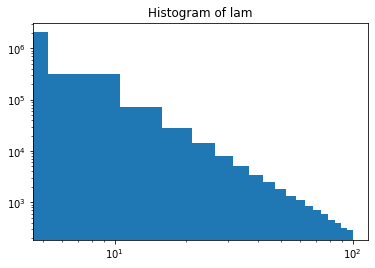

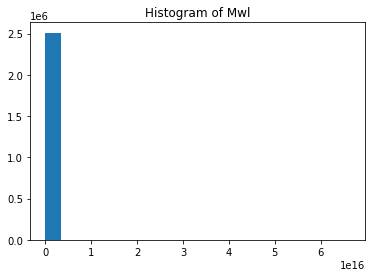

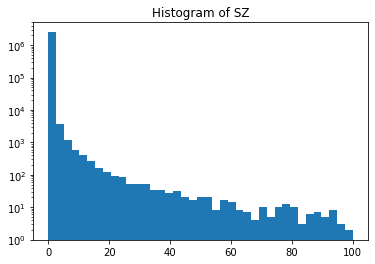

Number of halos with SZ < 4: 2505217
Number of halos with SZ > 4: 4670


In [114]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(mass_function=mf,
                            scaling_relation=sr,
                            r=0.5,
)

In [115]:
kwargs, lam_list,sz_list,diff_list,count_list = mco.verify_theory_mean_mwl_given_lam_sz_bin(lam1=10,
                                            lam2=100,
                                            sz_threshold=4,
                                            bin_numbers=[2,5])

All halos within lam1 and lam2: 152846
Statistics for 2 bins
count_list[i]=array([[147102.,    328.],
       [  3850.,   1566.]])
diff_list[i]=array([[-0.00022809,  0.00598435],
       [ 0.00619909, -0.01377148]])
---------------------------------------
All halos within lam1 and lam2: 152846
Statistics for 5 bins
count_list[i]=array([[1.2902e+05, 3.0000e+00],
       [1.5252e+04, 1.3500e+02],
       [4.5190e+03, 4.5700e+02],
       [1.5870e+03, 6.9700e+02],
       [5.7400e+02, 6.0200e+02]])
diff_list[i]=array([[-0.00061098, -0.10827449],
       [ 0.0009054 , -0.01568407],
       [ 0.01013891,  0.02414874],
       [ 0.00186526, -0.00928504],
       [ 0.01142145, -0.03608869]])
---------------------------------------


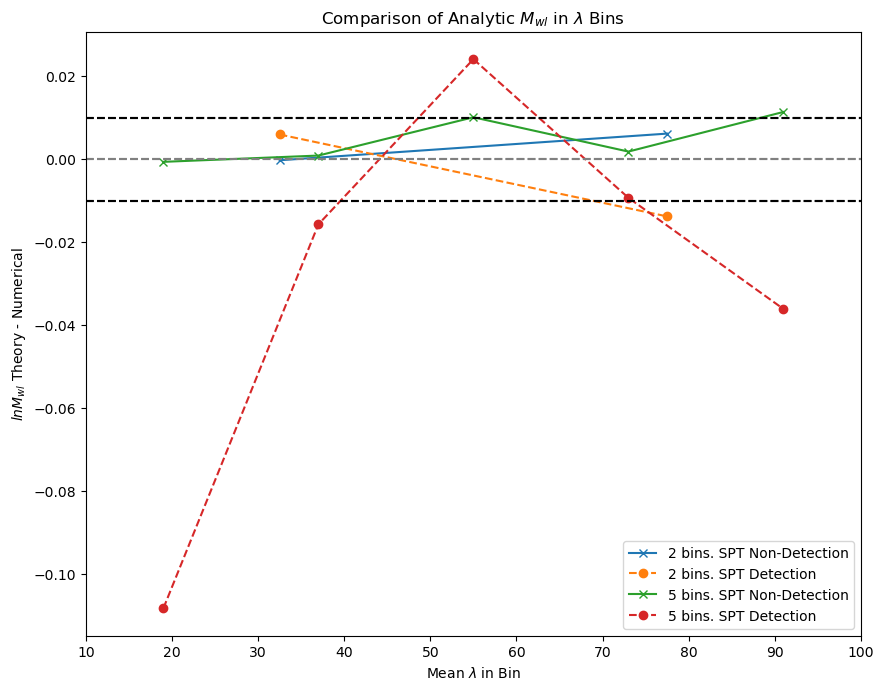

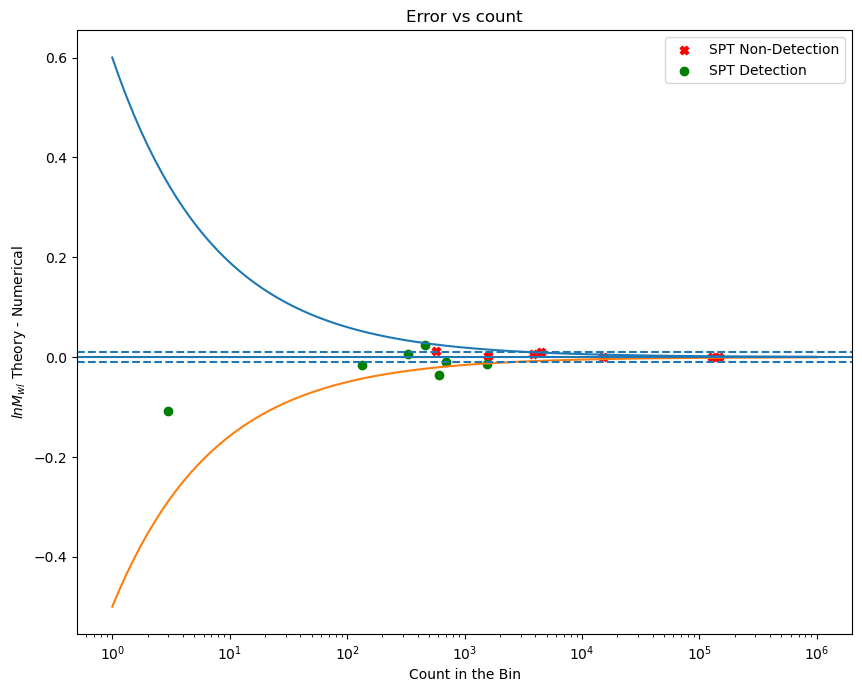

In [116]:
mco.plot_diff_by_bin_numbers(lam_list,sz_list,diff_list,count_list,**kwargs)